# CAS KAGGLE: Anlàlisi de dades d'escacs

https://www.kaggle.com/datasnaek/chess

### Naroa Sarrià 1706167, Inés Gómez 1704361

### EDA + PREPROCESSING

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set_style('whitegrid')

## 1. EDA (Exploratory Data Analysis)

Carreguem el nostre dataset per veure com son les nostres dades i, posteriorment, veure les dimensions i el tipus de variables.

In [2]:
df = pd.read_csv("games.csv")
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [3]:
print("Dimensions:", df.shape)
df.info()

Dimensions: (20058, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory u

Ara mirem si tenim variables NaN's a les dades

In [4]:
df.isna().mean().sort_values(ascending=False)

id                0.0
rated             0.0
created_at        0.0
last_move_at      0.0
turns             0.0
victory_status    0.0
winner            0.0
increment_code    0.0
white_id          0.0
white_rating      0.0
black_id          0.0
black_rating      0.0
moves             0.0
opening_eco       0.0
opening_name      0.0
opening_ply       0.0
dtype: float64

Com veiem, no tenim missing values a les dades, per tant mirem estadísticament les dades

In [5]:
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


Analitzem ara la nostre variable target, el guanyador de la partida, per veure la seva distribució i per tant per veure també si està balancejada

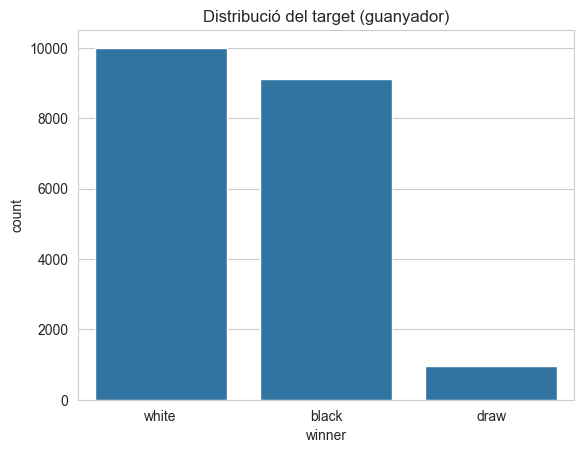

winner
white    0.498604
black    0.454033
draw     0.047363
Name: proportion, dtype: float64

In [6]:
sns.countplot(data=df, x="winner")
plt.title("Distribució del target (guanyador)")
plt.show()

df["winner"].value_counts(normalize=True)

Treiem els empats, ja que són molt pocs (menys del 5%). Per tant, simplificarem els models treient-los de la nostra base de dades i farem classicació binària (white vs black) ja que només ens aportarien soroll i faran molt més complicat entrenar els models de classificació.

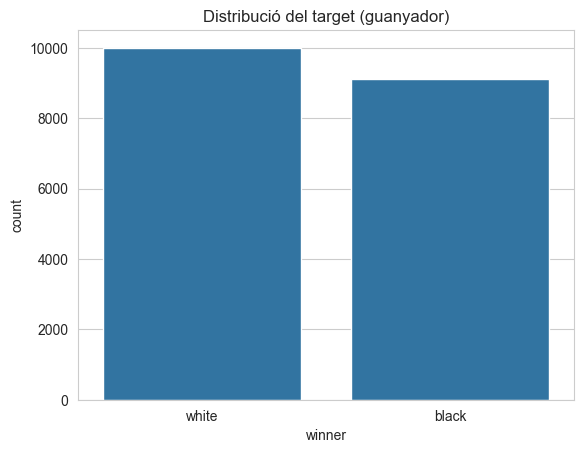

winner
white    0.523393
black    0.476607
Name: proportion, dtype: float64

In [7]:
df = df[df["winner"] != "draw"]
sns.countplot(data=df, x="winner")
plt.title("Distribució del target (guanyador)")
plt.show()

df["winner"].value_counts(normalize=True)

Ara analitzem les variables de ratings, per veure la seva distribució

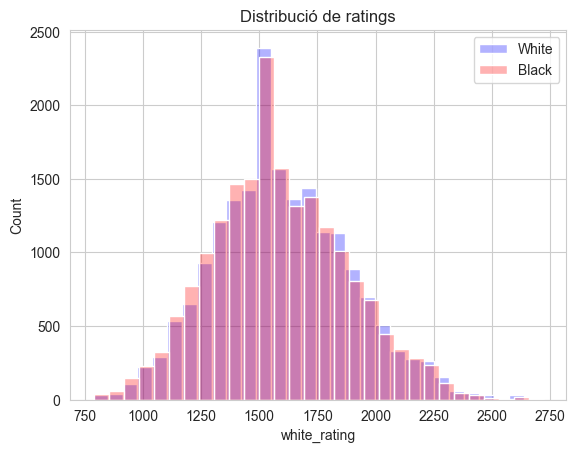

In [8]:
sns.histplot(df["white_rating"], bins=30, color="blue", alpha=0.3, label="White")
sns.histplot(df["black_rating"], bins=30, color="red",  alpha=0.3, label="Black")
plt.title("Distribució de ratings")
plt.legend()
plt.show()

Observem també ràpidament les apertures, per veure quants tipus en tenim i quines son les que mes es repeteixen. Com veiem que hi han masses tipus d'apertures diferents, les agruparem pel tipus d'apertura (no el seu codi propi), les agruparem segons si comencen per A, B, C, D, E (Millor explicat en el següent apartat)

In [9]:
df["opening_name"].value_counts()

opening_name
Van't Kruijs Opening                                                     352
Sicilian Defense                                                         343
Sicilian Defense: Bowdler Attack                                         283
Scotch Game                                                              260
French Defense: Knight Variation                                         256
                                                                        ... 
Italian Game: Scotch Gambit                                                1
English Opening: King's English Variation |  Taimanov Variation            1
Sicilian Defense: Najdorf Variation |  English Attack |  Anti-English      1
Ruy Lopez: Closed Variations |  Pilnik Variation                           1
Dutch Defense: Semi-Leningrad Variation                                    1
Name: count, Length: 1453, dtype: int64

In [10]:
df["opening_eco"].value_counts()

opening_eco
A00    968
C00    806
D00    701
B01    690
C41    663
      ... 
D77      1
C90      1
E35      1
E48      1
D19      1
Name: count, Length: 359, dtype: int64

## Preprocessing + Feature Engineering

Primer codifiquem el nostre target (**winner**) per tenir-lo com a 1 (white) i 0 (black)

In [11]:
df['winner'] = df['winner'].replace({'white': 1, 'black': 0})

C:\Users\nsarr\AppData\Local\Temp\ipykernel_3364\1425917397.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['winner'] = df['winner'].replace({'white': 1, 'black': 0})


Com hem vist a l'apartat anterior, no tenim cap calor NaN a les dades, per tant, ara mirarem si existeixen outliers i com tractar-los.

Començarem analitzant si es poden detectar outliers en la variable "turns".

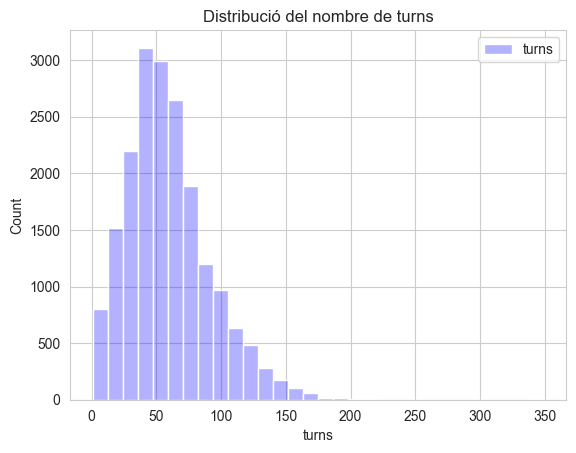

In [12]:
sns.histplot(df["turns"], bins=30, color="blue", alpha=0.3, label="turns")
plt.title("Distribució del nombre de turns")
plt.legend()
plt.show()


In [13]:
df["turns"].describe()

count    19108.000000
mean        59.188664
std         32.310010
min          1.000000
25%         37.000000
50%         54.000000
75%         77.000000
max        349.000000
Name: turns, dtype: float64

El nombre mínim de turns que es necessiten per poder guanyar una partida és 4, de manera que mirarem quantes partides tenim que tenen un nombre inferior a aquest i, seguidament, les eliminarem, ja que són partides que no ens aporten informació útil.

In [14]:
valor = (df["turns"] < 4).sum()
print("Nombre de partides amb un nombre de turns menor a 4:",valor)

Nombre de partides amb un nombre de turns menor a 4: 277


Com només són 277 partides, ens podem permetre treure aquestes del nostre dataset, per tal d'evitar que valors inconsistents ens afectin el nostre model. 

In [15]:
df = df[df["turns"] >= 4]
valor = (df["turns"] < 4).sum()
print("Comprovem que ara hi ha",valor,"partides amb menys de 4 moviments.")

Comprovem que ara hi ha 0 partides amb menys de 4 moviments.


Mirem ara valors massa elevats. Una partida amb més de 200 moviments són casos molt extrems, que no passen gairebé mai, per tant, podem mirar quants casos tenim i, si són pocs, els podrem eliminar, ja que no representen bé les nostres dades.

In [16]:
valor = (df["turns"] > 200 ).sum()
print("Tenim",valor,"partides amb més de 200 moviments.")

Tenim 11 partides amb més de 200 moviments.


In [17]:
#Com només són 11 partides, les podem eliminar.
df = df[df["turns"] <= 200]
valor = (df["turns"] > 200 ).sum()
print("Tenim",valor,"partides amb més de 200 moviments.")

Tenim 0 partides amb més de 200 moviments.


A continuació, començarem a tractar i a fer feature engineering amb les variables conegudes prèvies a començar la partida.

Comencem per tant creant la variable **diff_rating** que serà la diferència entre els ratings dels dos jugadors (white_rating - black_rating)

In [18]:
df["diff_rating"] = df["white_rating"] - df["black_rating"]

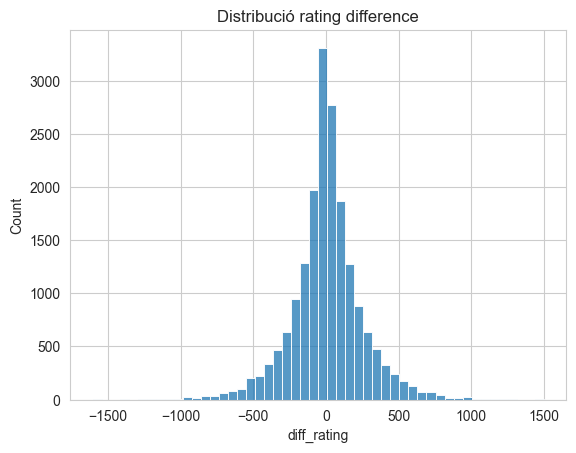

In [19]:
sns.histplot(df["diff_rating"], bins=50)
plt.title("Distribució rating difference")
plt.show()

Ara farem variables que vagin acumulant el winrate global dels dos jugadors que s'enfrenten en cada partida fins aquell moment. Aquesta variable es calcularà com: $$\text{winrate} = \frac{\text{partides guanyades fins al moment}}{\text{partides totals jugades}}$$

Per fer aquestes variables, i les que farem a continuació, hem d'ordenar primerament les partides cronològicament

In [20]:
# Asegurar que la fecha esté en formato datetime
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')

# Ordenar por fecha
df = df.sort_values('created_at')

In [21]:
winning = {}

# Nuevas listas para almacenar variables explicativas
white_global_winrate = []
black_global_winrate = []

for _, row in df.iterrows():
    white = row["white_id"]
    black = row["black_id"]
    winner = row["winner"]  # 1 = white, 0 = black

    # Inicializar historial si no existe
    if white not in winning:
        winning[white] = { "total_matches" : 0, "wins" : 0}
    
    if black not in winning:
        winning[black] = { "total_matches" : 0, "wins" : 0}

    #Calcular el winrate que porten
    if (winning[white]["total_matches"] > 0):
        rate = winning[white]["wins"] / winning[white]["total_matches"]
        white_global_winrate.append(rate)
    else:
        white_global_winrate.append(0)


    if (winning[black]["total_matches"] > 0):
        rate = winning[black]["wins"] / winning[black]["total_matches"]
        black_global_winrate.append(rate)
    else:
        black_global_winrate.append(0)

    
    #Afegir la partida actual
    winning[white]["total_matches"] += 1
    if(winner == 1):
        winning[white]["wins"] += 1

    winning[black]["total_matches"] += 1
    if(winner == 0):
        winning[black]["wins"] += 1


# Añadir nuevas columnas al DataFrame
df["white_global_winrate"] = white_global_winrate
df["black_global_winrate"] = black_global_winrate
# fem diferència del winrate
df["diff_global_winrate"] = df["white_global_winrate"] - df["black_global_winrate"]

Ara fem les següents noves variables explicatives per a cada parella de jugadors que s'enfrenten:
* **vs_white_winrate**: es un percentatge de victòries prèvies del jugador que juga amb blanques contra aquell mateix rival abans de la partida actual. Cal esmentar que els empats compten com 0,5.
* **vs_prev_matches**: Nombre total de partides que els dos jugadors havien jugat prèviament entre ells (sense importar colors ni resultats).

In [22]:

history = {}

# Nuevas listas para almacenar variables explicativas
vs_white_winrate = []
vs_prev_matches = []

for _, row in df.iterrows():
    white = row["white_id"]
    black = row["black_id"]
    winner = row["winner"] 

    # Crear key ordenada para la pareja
    pair = tuple(sorted([white, black]))

    # Inicializar historial si no existe
    if pair not in history:
        history[pair] = {
            "white_wins_player1": 0,
            "white_wins_player2": 0,
            "total_matches": 0
        }
        # Nunca se habían enfrentado antes
        vs_white_winrate.append(0.0)
        vs_prev_matches.append(0)
    else:
        # Recuperar historial previo
        p1, p2 = pair

        # Determinar cuántas veces ganó el blanco antes
        if white == p1:
            prev_white_wins = history[pair]["white_wins_player1"]
        else:
            prev_white_wins = history[pair]["white_wins_player2"]

        prev_total = history[pair]["total_matches"]

        # Calcular winning rate del blanco
        rate = prev_white_wins / prev_total if prev_total > 0 else 0.0
        
        vs_white_winrate.append(rate)
        vs_prev_matches.append(prev_total)

    # Actualizar historial *después* de registrar datos previos
    if winner == 1:  # blanco gana
        if white == pair[0]:
            history[pair]["white_wins_player1"] += 1
        else:
            history[pair]["white_wins_player2"] += 1
            
    # Siempre aumentar el total de partidas entre ellos
    history[pair]["total_matches"] += 1

# Añadir nuevas columnas al DataFrame
df["vs_white_winrate"] = vs_white_winrate
df["vs_prev_matches"] = vs_prev_matches


Ara veurem que tenim a la base de dades molts jugadors que juguen recurrentment (ja sigui amb blanques o negres) cosa que ens motiva per crear una nova variable amb l'experiència de cada jugador.
* **white_experience**: nombre total de partides que el jugador que porta blanques havia jugat abans de la partida actual (experiència acumulada).
* **black_experience**: nombre total de partides que el jugador que porta negres havia jugat abans de la partida actual.
* **diff_exp**: diferència de experiència entre els dos jugadors: $$\text{diff\_exp} = \text{white\_experience - black\_experience}$$

In [23]:
print(df["white_id"].value_counts()) # Vemos que hay muchos jugadores que juegan múltiples veces, (ya sea con white o black)
print(df["black_id"].value_counts())

white_id
taranga           71
ssf7              47
a_p_t_e_m_u_u     44
bleda             43
hassan1365416     43
                  ..
dediraut           1
nikolay111         1
sharparrow         1
trzodachlewna      1
tal_mikhail777     1
Name: count, Length: 9020, dtype: int64
black_id
taranga               82
vladimir-kramnik-1    58
a_p_t_e_m_u_u         44
docboss               43
king5891              42
                      ..
djlambton              1
gatan5                 1
letabac                1
galwain                1
thorium232             1
Name: count, Length: 8896, dtype: int64


In [24]:
experience = {}

diff_exp = []

for _, row in df.iterrows():
    white = row["white_id"]
    black = row["black_id"]

    if white not in experience:
        experience[white] = {"total_matches": 0}
    if black not in experience:
        experience[black] = {"total_matches": 0}

    # diferència
    diff_exp.append(experience[white]["total_matches"] - experience[black]["total_matches"])
    
    # Actualizar después
    experience[white]["total_matches"] += 1
    experience[black]["total_matches"] += 1
    
df["diff_experience"] = diff_exp

També serà molt interessant tenir unes variables amb les ratxes de victòries de cada jugador. D'aquesta manera tindrem un recompte de les victòries consecutives de cada jugador, definint les noves variables explicatives:
* **white_win_streak**: ratxa de victòries consecutives del jugador que porta blanques fins a la partida actual.
    - Una victòria suma +1 a la ratxa.
    - Una derrota fa que la ratxa es reiniciï a 0 o es mantingui a 0 (si ja estava a 0).
* **black_win_streak**: ratxa de victòries consecutives del jugador que porta negres fins a la partida actual.
    - Una victòria suma +1 a la ratxa.
    - Una derrota (o si la ratxa es talla) fa que la ratxa es reiniciï a 0 o es mantingui a 0 (si ja estava a 0).
Així podem fer un seguiment de la ratxa de cada jugador en funció de les victòries i derrotes a mesura que avancen les partides.

In [25]:
history = {}

white_win_streak = []
white_loss_streak = []
black_win_streak = []
black_loss_streak = []

for _, row in df.iterrows():
    white = row["white_id"]
    black = row["black_id"]
    result = row["winner"]   # 1 = guanya blanc, 0 = guanya negre

    if white not in history:
        history[white] = {"win": 0, "loss": 0}
    if black not in history:
        history[black] = {"win": 0, "loss": 0}

    white_win_streak.append(history[white]["win"])
    white_loss_streak.append(history[white]["loss"])
    black_win_streak.append(history[black]["win"])
    black_loss_streak.append(history[black]["loss"])

    if result == 1:
        history[white]["win"]  += 1
        history[white]["loss"]  = 0
        history[black]["loss"] += 1
        history[black]["win"]   = 0

    else:
        history[white]["loss"] += 1
        history[white]["win"]   = 0
        history[black]["win"]  += 1
        history[black]["loss"]  = 0


df["white_win_streak"] = white_win_streak
df["white_loss_streak"] = white_loss_streak
df["black_win_streak"] = black_win_streak
df["black_loss_streak"] = black_loss_streak

df["diff_win_streak"] = df["white_win_streak"] - df["black_win_streak"]
df["diff_loss_streak"] = df["white_loss_streak"] - df["black_loss_streak"]


Ara que ja hem acabat el feature engineering amb els coneixements previs al començament de la partida, mirem les correlacions, exclusivament entre aquestes variables i el target

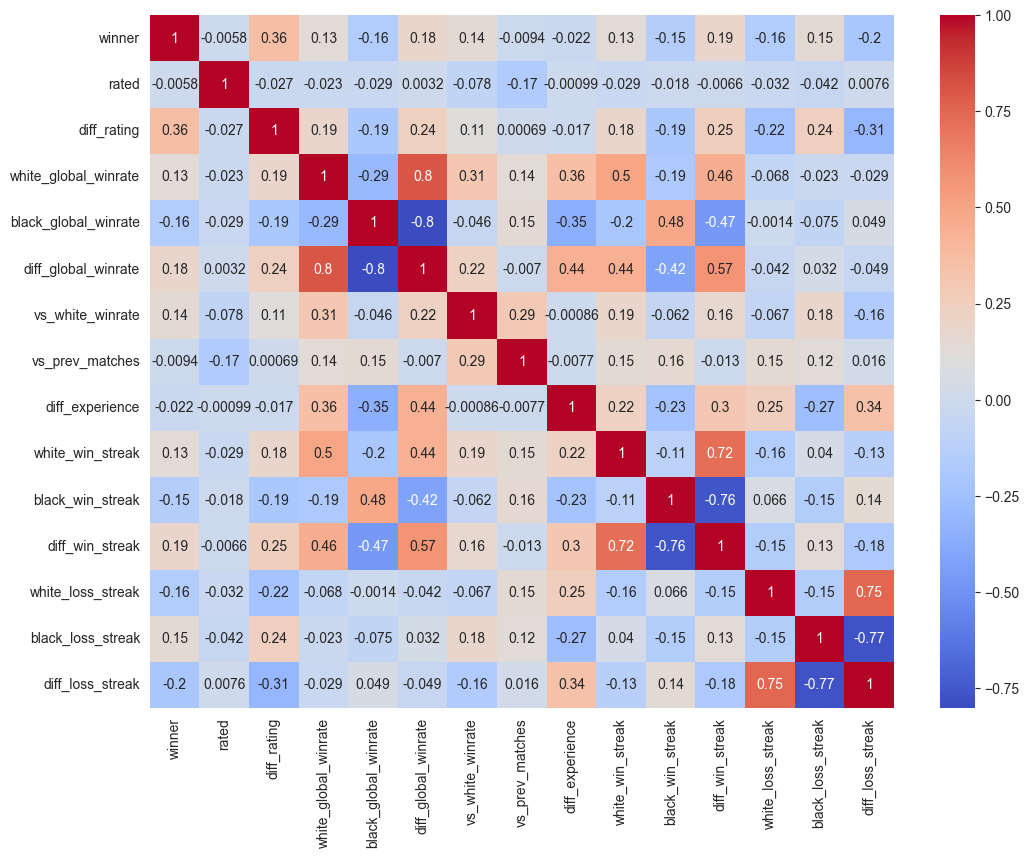

In [26]:
variables_previes = ['winner','rated', 'diff_rating', 
                     'white_global_winrate', 'black_global_winrate','diff_global_winrate',
                     'vs_white_winrate', 'vs_prev_matches',
                     'diff_experience',
                     'white_win_streak','black_win_streak','diff_win_streak',
                     'white_loss_streak','black_loss_streak','diff_loss_streak']
corr_matrix = df[variables_previes].corr()

plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

Comencem ara a tractar les variables que es van coneixent a mesura que avança la partida, per veure després l'evolució dels nostres models


Primer canviarem les variables de opening_eco per codificar només el tipus d'apertura:
Códigos ECO (A–E)
* A – Aperturas Flancas y poco comunes
* B – Aperturas Semiabiertas
* C – Aperturas abiertas
* D – Aperturas cerradas y semi-cerradas
* E – Aperturas de peón de dama con defensa india

EXPLICAR MEJOR DESPUÉS

In [27]:
# Crear nueva columna con la primera letra del ECO
df["opening_group"] = df["opening_eco"].astype(str).str[0]
df["opening_group"].value_counts()

opening_group
C    7268
B    4895
A    3656
D    2527
E     474
Name: count, dtype: int64

In [28]:
# les codifiquem per tenir 5 columnes amb True i False
df = pd.get_dummies(df, columns=["opening_group"], drop_first=False)

In [29]:
df.tail()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,...,white_loss_streak,black_win_streak,black_loss_streak,diff_win_streak,diff_loss_streak,opening_group_A,opening_group_B,opening_group_C,opening_group_D,opening_group_E
13682,qCmTWffu,True,2017-09-04 01:27:41.297,1.504489e+12,55,mate,1,10+0,networkchess2,1940,...,0,0,0,2,0,False,False,False,True,False
16582,5JxE5a6e,True,2017-09-04 01:28:53.111,1.504489e+12,61,mate,1,10+0,elijahreese,1871,...,0,0,0,1,0,True,False,False,False,False
16581,8Xr8Hmp7,True,2017-09-04 01:41:20.676,1.504490e+12,48,resign,0,10+0,elijahreese,1873,...,0,0,0,2,0,False,False,True,False,False
19463,dGvzzC9L,True,2017-09-04 02:30:59.427,1.504493e+12,67,resign,1,10+0,samoo1477,1754,...,0,0,1,1,-1,False,False,True,False,False
19462,mLY9CCtH,True,2017-09-04 02:45:43.790,1.504494e+12,65,resign,1,10+0,vertis9016,1822,...,2,2,0,-2,2,False,False,True,False,False


Ara que ja tenim totes les nostres variables explicatives, normalitzem totes les numèriques per tenir-les en el mateix rang.

In [30]:
scaler = StandardScaler()

# Solo normalizamos variables numéricas que nos interesan
num_vars = ['rated', 'diff_rating', 
            'white_global_winrate', 'black_global_winrate','diff_global_winrate',
            'vs_white_winrate', 'vs_prev_matches',
            'diff_experience',
            'white_win_streak','black_win_streak','diff_win_streak',
            'white_loss_streak','black_loss_streak','diff_loss_streak',
            'opening_group_A','opening_group_B','opening_group_C','opening_group_D','opening_group_E']
df[num_vars] = scaler.fit_transform(df[num_vars])

Ens guardem el nostre nou dataset amb els canvis realitzats, per poder començar a entrenar models

In [31]:
df.to_csv('games_2.csv',index=False)